In [9]:
from networks import get_network, get_network_stats, plot_grid_network, get_city_network, plot_city_network
from dla_rand_new import plot_grid
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Analysing Seb's periodic DLA networks

In [67]:
grid = np.load("10k_1periods2.npy", allow_pickle = True)

In [68]:
G = get_network(grid)

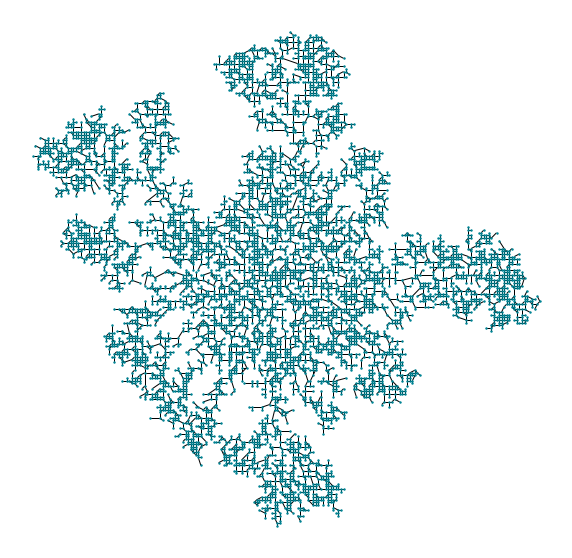

In [69]:
plot_grid_network(G, node_size = 2)

In [70]:
get_network_stats(G)

,average_degree,average_clustering,transitivity,entropy,dead_ends,ways_4,nodes
0,2.910202,0.093752,0.111439,1.700898,0.153107,0.235337,6871


# Getting fractals from networks

In [71]:
G = get_city_network("Berlin, Germany")

In [43]:
node_ids = list(G.nodes())
list_ys = []
list_xs = []

for node_id in node_ids:
    y = G.nodes[node_id]["y"]
    x = G.nodes[node_id]["x"]
    list_ys.append(y)
    list_xs.append(x)

In [34]:
# lenght (in cells) of the fractal grid


In [44]:
lenght = 150
H, xedges, yedges = np.histogram2d(list_xs, list_ys, bins = lenght)

In [45]:
H = H.T

(<matplotlib.image.AxesImage at 0x7fe2a97ed1c0>,)

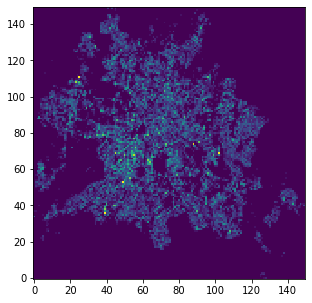

In [48]:
plt.figure(figsize = (5,5))
plt.imshow(H, interpolation='nearest', origin='lower')

In [52]:
threshold = 0
tmp = H > threshold

tmp = tmp.astype(int)

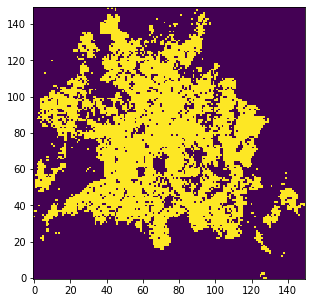

In [53]:
plt.figure(figsize = (5,5))
plt.imshow(tmp, interpolation='nearest', origin='lower')

In [50]:
H.shape

(150, 150)

In [58]:
def get_fractal_from_network(G, bins = 150, threshold = 0):
    """
    Takes a graph generated with get_city_network and return a binary
    2d grid representing the fractal of the city.
    bins - amount of cells in the grid (bins x bins),
    threshold - number of nodes that should fall into a cell in order 
    for the cell to have a value of 1
    """
    # get the list of node ids
    node_ids = list(G.nodes())
    list_ys = []
    list_xs = []
    # get coordinates of each node
    for node_id in node_ids:
        y = G.nodes[node_id]["y"]
        x = G.nodes[node_id]["x"]
        list_ys.append(y)
        list_xs.append(x)
    H, xedges, yedges = np.histogram2d(list_xs, list_ys, bins = bins)
    H = H.T
    H = H > threshold
    return H.astype(int)
    

In [59]:
H = get_fractal_from_network(G)

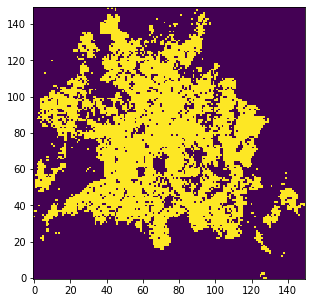

In [60]:
plt.figure(figsize = (5,5))
plt.imshow(tmp, interpolation='nearest', origin='lower')

## Analysing berling networks properties

In [3]:
G, G0 = get_city_network("Berlin, Germany", get_multi = True)

In [72]:
get_network_stats(G, osmnx = True)

,average_degree,average_clustering,transitivity,entropy,dead_ends,ways_4,nodes
0,2.998675,0.05238,0.05848,3.571824,0.119393,0.25665,27933


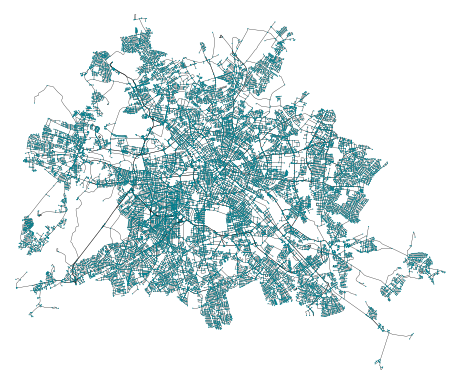

In [4]:
plot_city_network(G0)

# From DLA to networks (visualisations)

In [7]:
grid = np.load("results/changing_stickness_400_walkers/0.2,90.npy", allow_pickle = True)

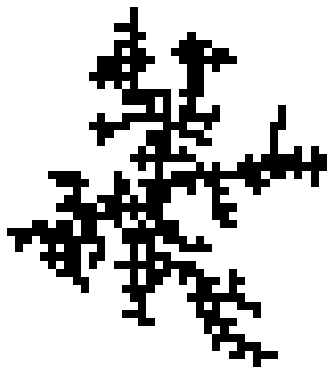

<Figure size 432x288 with 0 Axes>

In [22]:
plot_grid(grid)
plt.savefig("figures/grid.png")

In [18]:
G = get_network(grid, simplify = False)

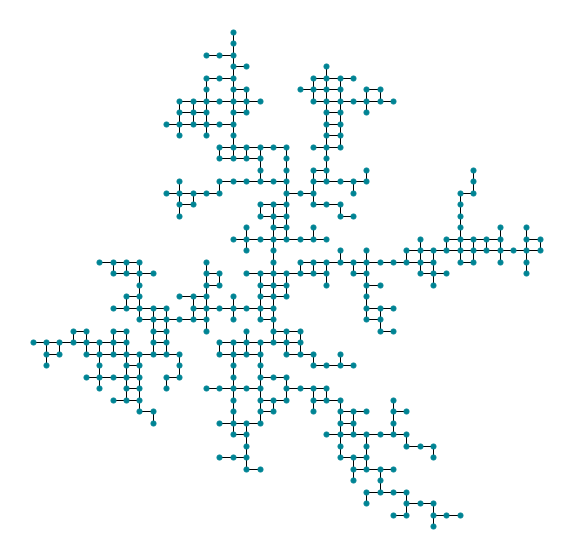

In [19]:
plot_grid_network(G)
plt.savefig("figures/network.png")

In [20]:
G = get_network(grid, simplify = True)

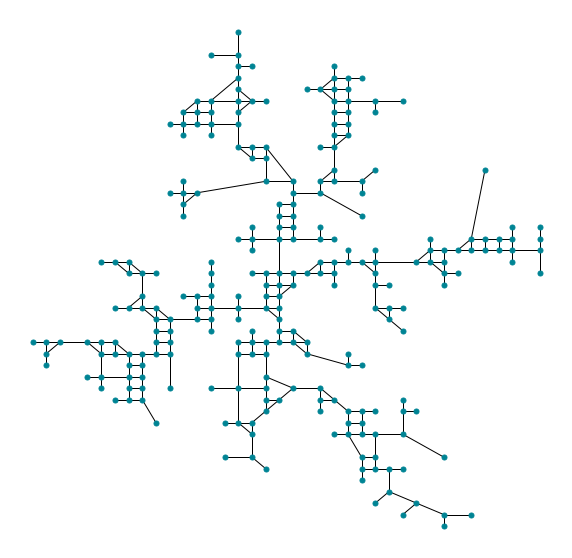

In [21]:
plot_grid_network(G)
plt.savefig("figures/network_simplified.png")